<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/15_2_pre_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow에서는 이미 학습된 모델을 손쉽게 불러올 수 있습니다. 

주요 논문 등에 나온 모델을 이미 데이터 학습이 완료된 상태로 불러올 수 있습니다. 

https://www.tensorflow.org/api_docs/python/tf/keras/applications



In [1]:
import tensorflow as tf

model = tf.keras.applications.MobileNetV2()

In [2]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [3]:
tf.keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [4]:
model.weights

[<tf.Variable 'Conv1/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-1.71659231e-01, -3.33731920e-01,  5.30122258e-02,
           -5.93232973e-21,  2.08742931e-01, -1.20433941e-01,
            1.75700430e-02, -3.10708203e-22, -9.62498877e-03,
            1.90229788e-01, -3.67278278e-01,  3.95997976e-22,
           -2.36236629e-22,  3.36706383e-22,  8.83555040e-02,
           -7.75416642e-02,  3.95842289e-05, -3.63377742e-02,
            5.99925742e-02,  5.53736472e-21, -4.68022423e-04,
           -1.23387486e-01, -1.34351701e-01,  8.75968020e-03,
           -2.47503355e-01,  1.58492010e-02, -2.43145856e-04,
           -1.09811597e-01,  5.55126644e-22, -2.03368161e-03,
            2.83311605e-01,  7.66634047e-02],
          [-3.18941772e-01, -6.09864295e-01, -1.70770675e-01,
           -6.76705635e-21, -5.82342505e-01, -2.56068230e-01,
           -4.18974347e-02,  1.32427304e-22,  2.00757684e-04,
            3.29488933e-01, -4.01886106e-01,  3.63034420e-22,
            1

In [5]:
tf.keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


텐서플로 데이터셋은 여러가지 데이터셋을 제공합니다. 

https://www.tensorflow.org/datasets/catalog/overview

https://www.tensorflow.org/datasets/overview

In [6]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imagenet_v2',
    split='test', #split['train', 'test']
    with_info=True,
    as_supervised=True,
)

Shuffling and writing examples to C:\Users\Jae\tensorflow_datasets\imagenet_v2\matched-frequency\1.0.0.incompleteRG5I1W\imagenet_v2-test.tfrecord


Dataset imagenet_v2 downloaded and prepared to C:\Users\Jae\tensorflow_datasets\imagenet_v2\matched-frequency\1.0.0. Subsequent calls will reuse this data.


In [7]:
!ls '/root/tensorflow_datasets/imagenet_v2/matched-frequency/1.0.0'

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [8]:
dataset

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [9]:
info

tfds.core.DatasetInfo(
    name='imagenet_v2',
    version=1.0.0,
    description='ImageNet-v2 is an ImageNet test set (10 per class) collected by closely
following the original labelling protocol. Each image has been labelled by
at least 10 MTurk workers, possibly more, and depending on the strategy used to
select which images to include among the 10 chosen for the given class there are
three different versions of the dataset. Please refer to section four of the
paper for more details on how the different variants were compiled.

The label space is the same as that of ImageNet2012. Each example is
represented as a dictionary with the following keys:

* 'image': The image, a (H, W, 3)-tensor.
* 'label': An integer in the range [0, 1000).
* 'file_name': A unique sting identifying the example within the dataset.',
    homepage='https://github.com/modestyachts/ImageNetV2',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None,

In [10]:
info.features['label']

ClassLabel(shape=(), dtype=tf.int64, num_classes=1000)

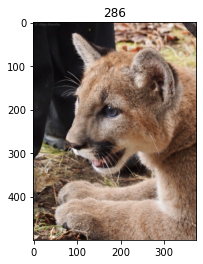

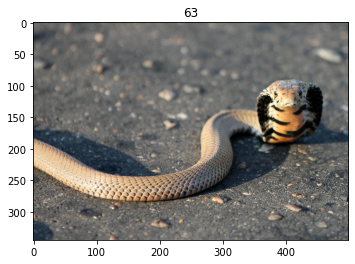

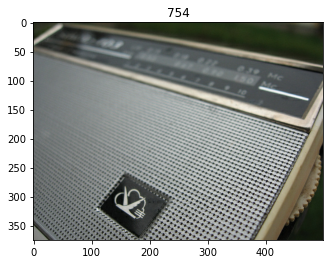

In [11]:
import matplotlib.pyplot as plt

for image, label in dataset.take(3):
    plt.title(label.numpy())
    plt.imshow(image)
    plt.show()

In [12]:
info.features['label'].int2str(418)

'n02783161'

https://github.com/modestyachts/ImageNetV2/blob/master/data/metadata/class_info.json


In [13]:
import pandas as pd

names = pd.read_json('https://raw.githubusercontent.com/modestyachts/ImageNetV2/master/data/metadata/class_info.json')

In [14]:
names

,cid,wnid,synset,gloss
0,0,n01440764,"[tench, Tinca tinca]",freshwater dace-like game fish of Europe and w...
1,1,n01443537,"[goldfish, Carassius auratus]",small golden or orange-red freshwater fishes o...
2,2,n01484850,"[great white shark, white shark, man-eater, ma...",large aggressive shark widespread in warm seas...
3,3,n01491361,"[tiger shark, Galeocerdo cuvieri]",large dangerous warm-water shark with striped ...
4,4,n01494475,"[hammerhead, hammerhead shark]",medium-sized live-bearing shark with eyes at e...
...,...,...,...,...
995,995,n13044778,[earthstar],any fungus of the family Geastraceae; in form ...
996,996,n13052670,"[hen-of-the-woods, hen of the woods, Polyporus...",large greyish-brown edible fungus forming a ma...
997,997,n13054560,[bolete],any fungus of the family Boletaceae
998,998,n13133613,"[ear, spike, capitulum]",fruiting spike of a cereal plant especially corn


In [15]:
names.query('cid==418')

,cid,wnid,synset,gloss
418,418,n02783161,"[ballpoint, ballpoint pen, ballpen, Biro]",a pen that has a small metal ball as the point...


In [16]:
IMG_SIZE = 224

def resize(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  
    return image, label

In [17]:
tests = dataset.map(resize)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


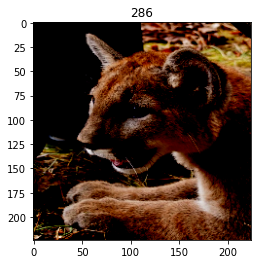

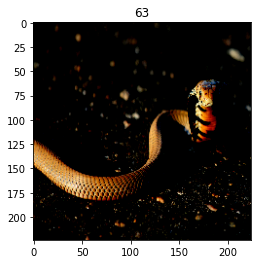

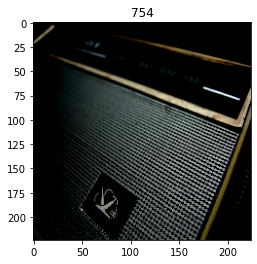

In [18]:
for image, label in tests.take(3):
    plt.imshow(image)
    plt.title(label.numpy())
    plt.show()  

In [19]:
import numpy as np

t = []

for image, label in tests.take(3):
    t.append(image)
    
t = np.array(t)

In [20]:
pred_t = model.predict(t)
pred_t.argmax(axis=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([286,  53, 754], dtype=int64)

In [21]:
names.query('cid==418 | cid==182 | cid == 234')

,cid,wnid,synset,gloss
182,182,n02093754,[Border terrier],small rough-coated terrier of British origin
234,234,n02106550,[Rottweiler],German breed of large vigorous short-haired ca...
418,418,n02783161,"[ballpoint, ballpoint pen, ballpen, Biro]",a pen that has a small metal ball as the point...


이미지넷 분류 정확도 참고

https://paperswithcode.com/sota/image-classification-on-imagenet